## Setup environment

In [1]:
import matplotlib.pyplot as plt

from simulators.grid_world.grid_world import Maze, simulate_policy, set_granular_reward, set_normilized_reward, divide_reward_by
from simulators.grid_world import HORIZON

grid_type = "simple"
feature_type = "one_hot"
dimensions = 124

# feature_type = "simularity"
# dimensions = 100
sigma = 0.25

env = Maze(grid_type, feature_type, dimensions=dimensions, sigma=sigma)

## Expert policy

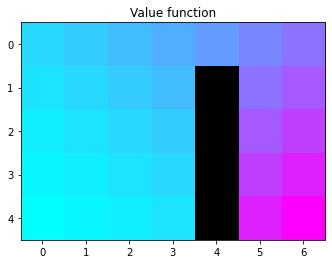

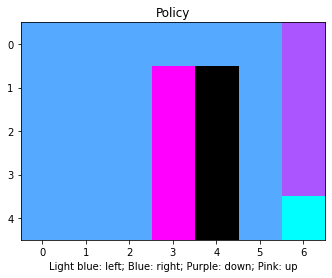

In [2]:
from algorithms.VI_dynamic_programming import value_iteration

expert_Q, expert_policy = value_iteration(env.P, env.R, env.gamma)

# Uncomment if you want to simulate the policy
# simulate_policy(expert_policy, f"../../videos/grid_world/{grid_type}_expert.mp4", env, HORIZON)

env.display_value_function(expert_Q)
env.display_policy(expert_Q)

### Change reward to granular setting

In [3]:
env = set_granular_reward(env, expert_policy)
env = set_normilized_reward(env)
env = divide_reward_by(env, 10)

## DQfD

End of expert phase


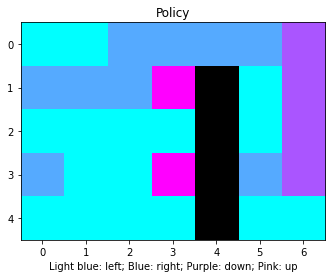

Beginning of rl phase


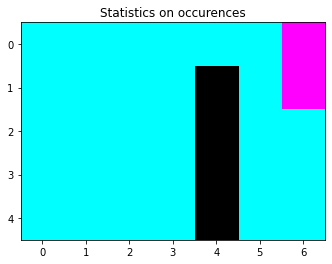

Max occurences 81.0


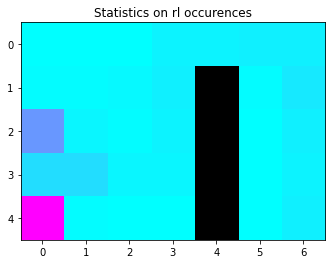

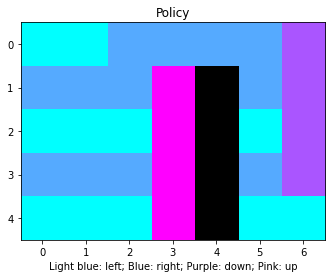

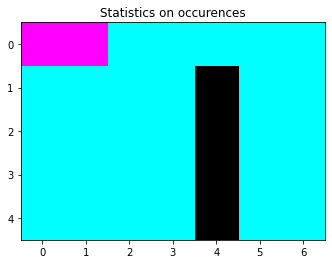

Max occurences 129.0


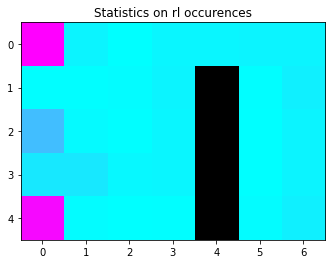

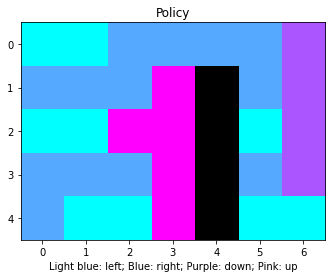

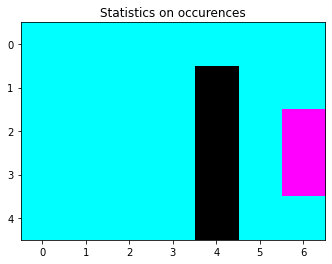

Max occurences 173.0


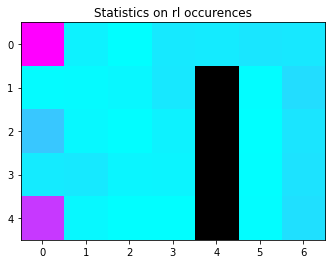

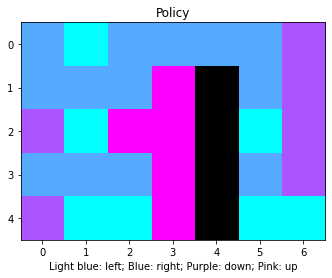

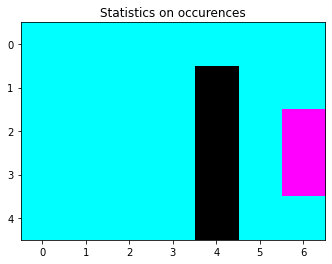

Max occurences 173.0


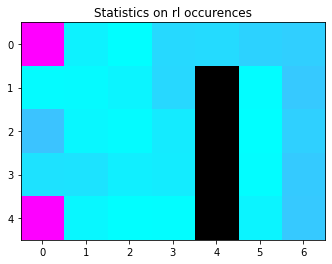

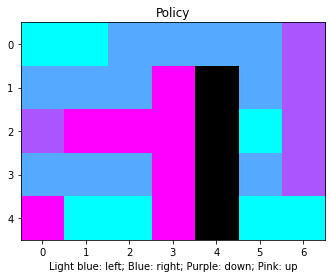

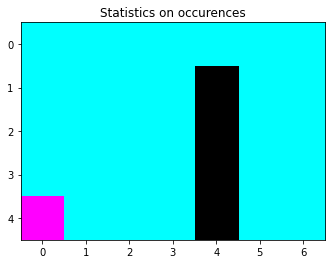

Max occurences 176.0


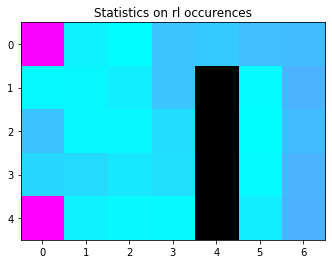

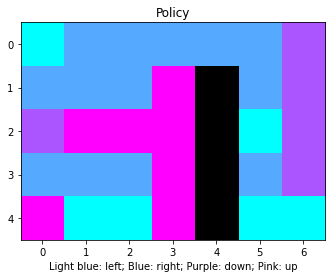

In [3]:
from algorithms.DQfD.tabular import tabular_DQfD

n_expert_trajectories = 8
n_step_td = 2
n_expert_iterations = 50
n_rl_iterations = 1000
epsilon_decay_limit = 0.1
update_target_frequency = 75
td_loss_weight = 1
n_td_loss_weight = 1
expert_weight = 1
diff_action_from_expert_penalisation = 0.8
show_args = {"show_policy":True, "show_value_function": False, "show_statistics": True, "display_frequency": 200}

DQfD_Q = tabular_DQfD(
    env,
    n_expert_trajectories,
    n_step_td,
    n_expert_iterations,
    n_rl_iterations,
    epsilon_decay_limit,
    update_target_frequency,
    td_loss_weight,
    n_td_loss_weight,
    expert_weight,
    diff_action_from_expert_penalisation,
    **show_args,
)

In [6]:
import numpy as np

np.argmax(DQfD_Q, axis=-1)

array([3, 0, 0, 3, 0, 0, 1, 1, 1, 3, 1, 2, 2, 3, 3, 3, 0, 2, 1, 1, 1, 3,
       1, 2, 0, 1, 1, 1, 1, 1, 2])

In [7]:
simulate_policy(np.argmax(DQfD_Q, axis=-1), f"../../videos/grid_world/{grid_type}_DQfD.mp4", env, HORIZON)

/workspaces/ReinforcementLearningWithDemonstration/env_container/lib/python3.9/site-packages/rlberry/envs/finite/gridworld.py:315: RuntimeWarning: invalid value encountered in double_scalars
  color = 0.5*np.abs(rwd)/self.reward_range[1]
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4745:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4745:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4745:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5233:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM default
ffmpeg version 4.3.3-0+deb11u1 Copyright (c) 2000-2021 the FFmpeg developers
  built with